In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier


In [2]:
df = pd.read_csv(".../parsed_jobs_with_role.csv")
# jobs_dataset_with_features.csv

In [3]:
df.shape
#show rows + cols

(1615940, 5)

In [3]:
df.head()

,Experience,Skills,Responsibilities,Salary,Role
0,5 to 15 Years,Digital Marketing Specialist M.Tech Social med...,Develop social media content calendars and str...,26801,Social Media Manager
1,2 to 12 Years,"Web Developer BCA HTML, CSS, JavaScript Fronte...",Collaborate with UX designers to optimize user...,100340,Frontend Web Developer
2,0 to 12 Years,Operations Manager PhD Quality control process...,Conduct quality audits and inspections.,84525,Quality Control Manager
3,4 to 11 Years,Network Engineer PhD Wireless network design a...,Troubleshoot wireless network issues.,129896,Wireless Network Engineer
4,1 to 12 Years,Event Manager MBA Event planning Conference lo...,"Coordinate speaker sessions, exhibitors, and a...",53944,Conference Manager


In [5]:
df.columns

Index(['Experience', 'Skills', 'Responsibilities', 'Salary', 'Role'], dtype='object')

In [23]:
df['Role'].value_counts()

Role
Interaction Designer            20580
Network Administrator           17470
User Interface Designer         14036
Social Media Manager            13945
User Experience Designer        13935
                                ...  
Inventory Control Specialist     3342
Budget Analyst                   3335
Clinical Nurse Manager           3324
Social Science Researcher        3321
Paid Advertising Specialist      3306
Name: count, Length: 376, dtype: int64

In [4]:
len(df['Role'].value_counts())

376

In [5]:
# Dropping classes with less than 6500 instances
min_count = 6500
role_counts = df['Role'].value_counts()
#select the "role" column and calculate number of instances of each unique role
dropped_classes = role_counts[role_counts < min_count].index
#extract the index (name) of the role and put them in a list
filtered_df = df[~df['Role'].isin(dropped_classes)].reset_index(drop=True)
#keep only rows that dont belong to dropped classes && reset index of the old df

# Checking the updated role counts
filtered_df['Role'].value_counts()

Role
Interaction Designer          20580
Network Administrator         17470
User Interface Designer       14036
Social Media Manager          13945
User Experience Designer      13935
                              ...  
Benefits Coordinator           6839
Research Analyst               6830
Administrative Coordinator     6803
IT Support Specialist          6799
UI/UX Designer                 6743
Name: count, Length: 61, dtype: int64

In [6]:
len(filtered_df['Role'].value_counts())

61

In [7]:
df = filtered_df.sample(n=10000)
# selects a random sample of 10,000 rows from the DataFrame filtered_df

In [8]:
df.head()

,Experience,Skills,Responsibilities,Salary,Role
73160,2 to 8 Years,"Software Engineer B.Com Proficiency in HTML, C...",Collaborate with UX designers to ensure a user...,41081,Frontend Developer
393695,1 to 10 Years,UX/UI Designer M.Com Interaction design princi...,Create wireframes and prototypes to illustrate...,54725,Interaction Designer
497835,2 to 8 Years,Procurement Manager PhD Procurement processes ...,Conduct supplier evaluations and performance a...,23647,Procurement Analyst
502681,3 to 8 Years,Systems Administrator M.Com Database managemen...,Backup and restore databases.,122876,Database Administrator
287617,4 to 9 Years,Civil Engineer B.Com Water resources engineeri...,Design and manage water resource systems and i...,25391,Water Resources Engineer


# TFIDF

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

df['Features'] = df['Skills'] + ' ' + df['Responsibilities'] + ' ' + df['Salary'].astype(str)

# Splitting the data into features (X) and target (y)
X = df['Features']
y = df['Role']

# Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# TF-IDF vectorization
# tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

Random Forest ________________________________________________________________________________________________

Accuracy: 0.9745
                                precision    recall  f1-score   support

             Account Executive       1.00      1.00      1.00        27
    Administrative Coordinator       1.00      1.00      1.00        25
             Automation Tester       1.00      1.00      1.00        23
             Backend Developer       1.00      1.00      1.00        42
          Benefits Coordinator       1.00      1.00      1.00        28
 Business Intelligence Analyst       1.00      1.00      1.00        27
   Client Relationship Manager       1.00      1.00      1.00        26
               Content Creator       1.00      1.00      1.00        29
            Content Strategist       1.00      1.00      1.00        25
      Customer Success Manager       1.00      1.00      1.00        42
   Customer Support Specialist       1.00      1.00      1.00        29
                  Data Analyst       1.00      1.00      1.00        42
         Data Entry Specialist       1.00     

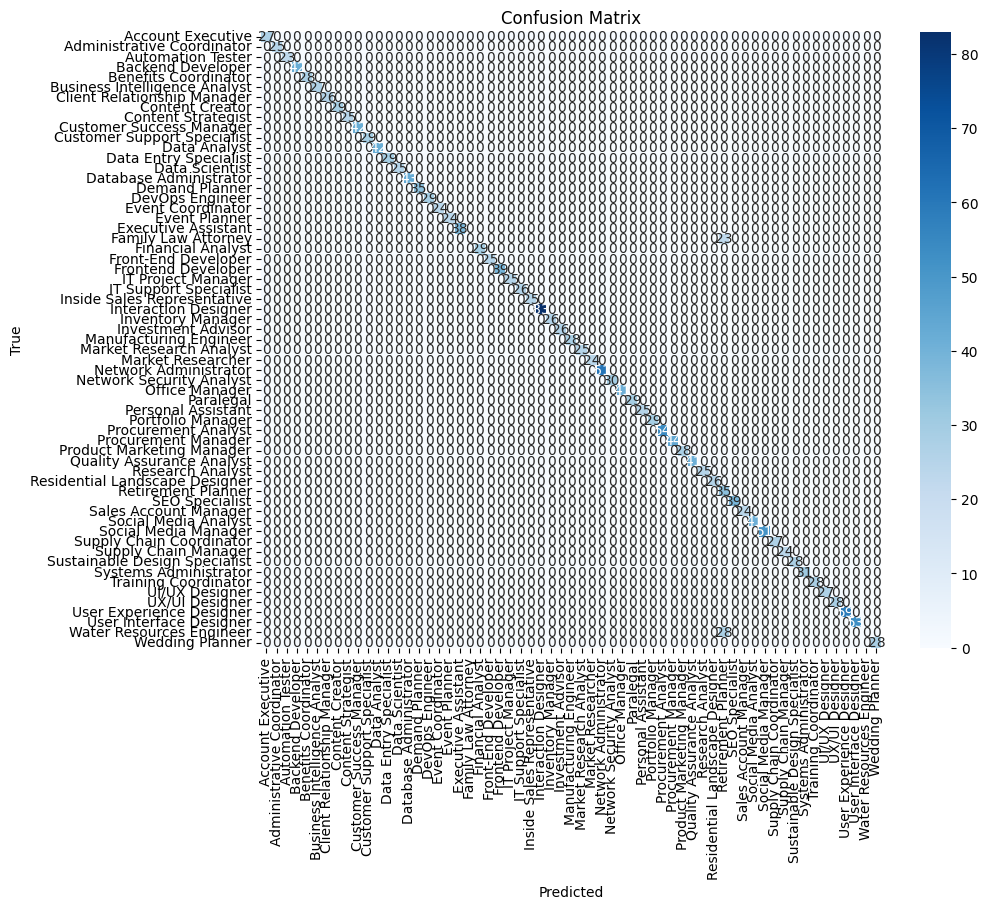

In [10]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# rf_classifier = RandomForestClassifier()
rf_classifier = RandomForestClassifier(max_depth=10, n_estimators=100, random_state=42)

rf_classifier.fit(X_train_tfidf, y_train)

# Step 4: Accuracy Evaluation
y_pred = rf_classifier.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test,y_pred, zero_division=0))
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [11]:
#valuate the model's generalizability
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_classifier, X_train_tfidf, y_train, cv=5)
print("Cross-Validation Accuracy:", scores.mean())


Cross-Validation Accuracy: 0.9629999999999999


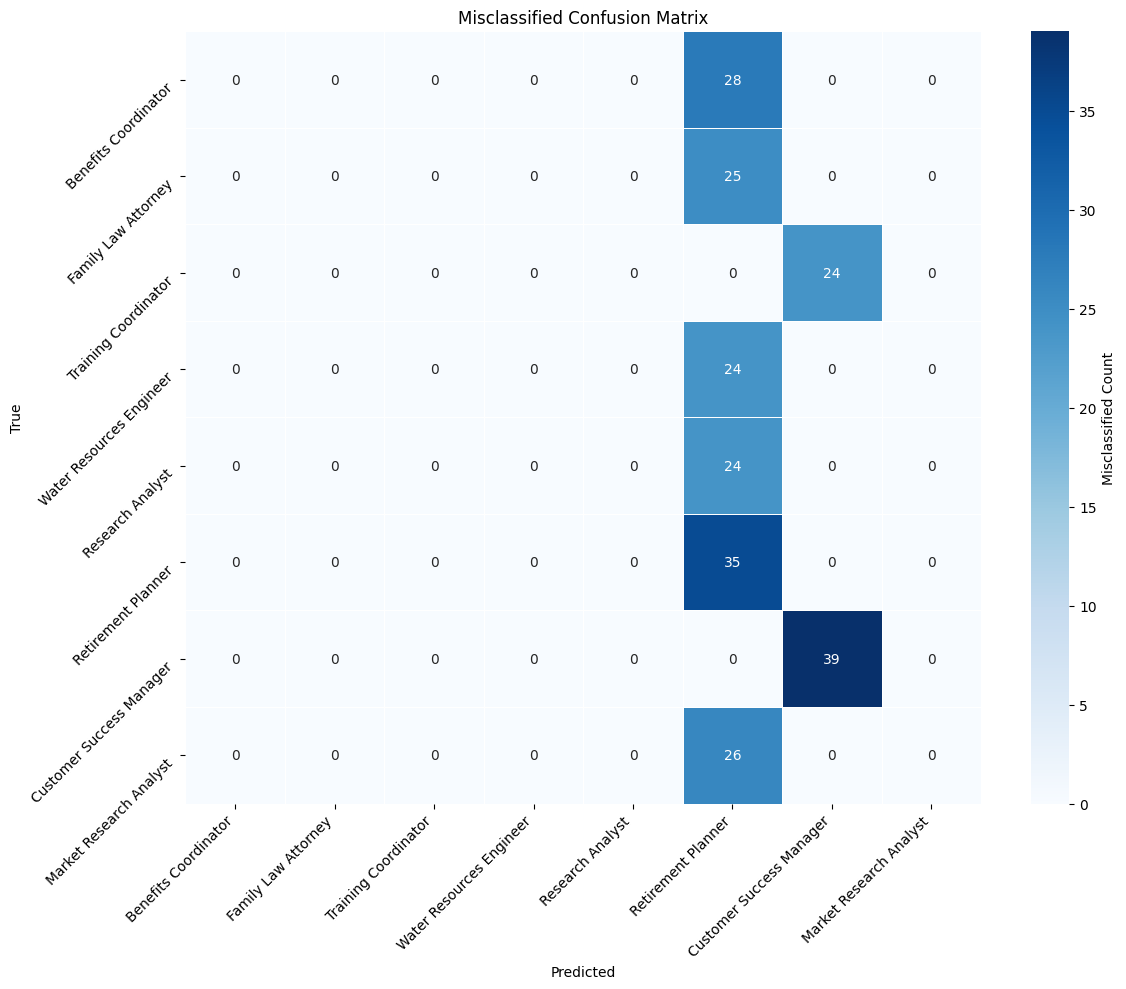

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming `conf_matrix` is already computed from the classifier
conf_matrix = confusion_matrix(y_test, y_pred)

# Find the misclassified roles (non-diagonal elements)
misclassified_indices = np.where(conf_matrix != np.diag(np.diagonal(conf_matrix)))

# Get misclassified rows and columns
misclassified_rows = misclassified_indices[0]
misclassified_cols = misclassified_indices[1]

# Create a list of misclassified roles
misclassified_roles = set(misclassified_rows) | set(misclassified_cols)

# Filter out the misclassified parts of the confusion matrix
misclassified_matrix = conf_matrix[list(misclassified_roles), :][:, list(misclassified_roles)]

# Plot the misclassified confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(misclassified_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.array(rf_classifier.classes_)[list(misclassified_roles)], 
            yticklabels=np.array(rf_classifier.classes_)[list(misclassified_roles)],
            cbar_kws={'label': 'Misclassified Count'}, linewidths=0.5)
plt.title('Misclassified Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, va='top')
plt.tight_layout()
plt.show()


# Recommendation

In [12]:
# Clean resume
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    #Remove Punctuation
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText)
    #Remove Non-ASCII Characters
    cleanText = re.sub('\s+', ' ', cleanText)
    #Remove Extra Spaces
    return cleanText


# Prediction and Category Name
def job_recommendation(resume_text):
    resume_text= cleanResume(resume_text)
    resume_tfidf = tfidf_vectorizer.transform([resume_text])
    predicted_category = rf_classifier.predict(resume_tfidf)[0]
    return predicted_category

<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\]'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\]'
<>:12: SyntaxWarning: invalid escape sequence '\s'
C:\Users\21629\AppData\Local\Temp\ipykernel_36600\1218046527.py:4: SyntaxWarning: invalid escape sequence '\S'
  cleanText = re.sub('http\S+\s', ' ', txt)
C:\Users\21629\AppData\Local\Temp\ipykernel_36600\1218046527.py:6: SyntaxWarning: invalid escape sequence '\S'
  cleanText = re.sub('#\S+\s', ' ', cleanText)
C:\Users\21629\AppData\Local\Temp\ipykernel_36600\1218046527.py:7: SyntaxWarning: invalid escape sequence '\S'
  cleanText = re.sub('@\S+', '  ', cleanText)
C:\Users\21629\AppData\Local

In [26]:
# Example Usage
resume_file = """Objective:
A creative and detail-oriented Designer with a passion for visual communication and brand identity seeking opportunities to leverage design skills in a dynamic and collaborative environment.

Education:
- Bachelor of Fine Arts in Graphic Design, XYZ College, GPA: 3.7/4.0
- Diploma in Web Design, ABC Institute, GPA: 3.9/4.0

Skills:
- Proficient in Adobe Creative Suite (Photoshop, Illustrator, InDesign)
- Strong understanding of typography, layout, and color theory
- Experience in both print and digital design
- Ability to conceptualize and execute design projects from concept to completion
- Excellent attention to detail and time management skills

Experience:
Graphic Designer | XYZ Design Studio
- Created visually appealing graphics for various marketing materials, including brochures, flyers, and social media posts
- Collaborated with clients to understand their design needs and deliver creative solutions that align with their brand identity
- Worked closely with the marketing team to ensure consistency in brand messaging across all platforms

Freelance Designer
- Designed logos, branding materials, and website layouts for small businesses and startups
- Managed multiple projects simultaneously while meeting tight deadlines and maintaining quality standards
- Established and maintained strong client relationships through clear communication and exceptional service

Projects:
- Rebranding Campaign for XYZ Company: Led a team to redesign the company's logo, website, and marketing collateral, resulting in a 30% increase in brand recognition
- Packaging Design for ABC Product Launch: Developed eye-catching packaging designs for a new product line, contributing to a successful launch and positive customer feedback

Certifications:
- Adobe Certified Expert (ACE) in Adobe Illustrator
- Responsive Web Design Certification from Udemy

Languages:
- English (Native)
- Spanish (Intermediate)
"""
predicted_category = job_recommendation(resume_file)
print("Predicted Category:", predicted_category)

Predicted Category: User Interface Designer


In [13]:
# Example Usage
resume_file = """Objective:
Dedicated and results-oriented Banking professional with a strong background in financial analysis and customer service seeking opportunities to contribute to a reputable financial institution. Eager to leverage expertise in risk management, investment strategies, and relationship building to drive business growth and client satisfaction.

Education:
- Bachelor of Business Administration in Finance, XYZ University, GPA: 3.8/4.0
- Certified Financial Analyst (CFA) Level I Candidate

Skills:
- Proficient in financial modeling and analysis using Excel, Bloomberg Terminal, and other financial software
- Extensive knowledge of banking products and services, including loans, mortgages, and investment products
- Strong understanding of regulatory compliance and risk management practices in the banking industry
- Excellent communication and interpersonal skills, with a focus on building rapport with clients and colleagues
- Ability to work efficiently under pressure and adapt to changing market conditions

Experience:
Financial Analyst | ABC Bank
- Conducted financial analysis and risk assessment for corporate clients, including credit analysis, financial statement analysis, and cash flow modeling
- Developed customized financial solutions to meet clients' needs and objectives, resulting in increased revenue and client retention
- Collaborated with cross-functional teams to identify new business opportunities and optimize existing processes

Customer Service Representative | DEF Bank
- Provided exceptional customer service to bank clients, addressing inquiries, resolving issues, and promoting banking products and services
- Processed transactions accurately and efficiently, including deposits, withdrawals, and account transfers
- Educated customers on various banking products and services, helping them make informed financial decisions

Internship | GHI Investments
- Assisted portfolio managers with investment research and analysis, including industry and company-specific research, financial modeling, and performance analysis
- Prepared investment presentations and reports for clients, highlighting investment opportunities and performance metrics
- Conducted market research and analysis to identify trends and opportunities in the financial markets

Certifications:
- Certified Financial Planner (CFP)
- Series 7 and Series 63 Securities Licenses

Languages:
- English (Native)
- Spanish (Proficient)

"""
predicted_category = job_recommendation(resume_file)
print("Predicted Category:", predicted_category)
#Supposed to be a financial analyst

Predicted Category: Data Analyst


In [23]:
import pickle
pickle.dump(rf_classifier,open('rf_classifier_job_recommendation.pkl','wb'))
pickle.dump(tfidf_vectorizer,open('tfidf_vectorizer_job_recommendation.pkl','wb'))